## Exercise 2
Assume the aperture requires a beam size 10 $\sigma\le 31.4$ mm. Start with the lattice from Exercise 1 and modify it so that the $\hat{\beta}$ satisfies this requirement (please use rounded numbers for convenience). The normalized beam emittance is $\epsilon_n = 2.0\  \mu$m.
The circumference and the energy must not be changed, all other parameters may be modified.

In [1]:
import numpy as np
from cpymad.madx import Madx
import matplotlib.pyplot as plt
get_ipython().magic('matplotlib inline')
%config InlineBackend.figure_format = 'retina' # retina display
import matplotlib.patches as patches

def plotLatticeSeries(ax,series, height=1., v_offset=0., color='r',alpha=0.5,lw=3):
    aux=series
    ax.add_patch(
    patches.Rectangle(
        (aux.s-aux.l, v_offset-height/2.),   # (x,y)
        aux.l,          # width
        height,          # height
        color=color, alpha=alpha,lw=lw
    )
    )
    return;

The key is to increase the number of cells...this will have an effect on the dispersion.

In [2]:
madx = Madx()
madx.input('''
title, ’CAS2019 Second Exercise’; 
circum=1000.0;
ncell = 20; !Number of cells 
lcell = circum/ncell;
lq = 3.00; !Length of a quadrupole

!element definitions;

!define bending magnet as multipole 
!we have 4 bending magnets per cell
mb:multipole,knl={2.0*pi/(4*ncell)};

!define quadrupoles as multipoles 
qf: multipole,knl={0,0.0098*lq}; 
qd: multipole,knl={0,-0.0098*lq};

!sequence declaration;
cas2: sequence, refer=centre, l=circum;
   start_machine: marker, at = 0;
   n = 1;
   while (n < ncell+1) {
    qf: qf, at=(n-1)*lcell;
    mb: mb, at=(n-1)*lcell+0.15*lcell;
    mb: mb, at=(n-1)*lcell+0.35*lcell;
    qd: qd, at=(n-1)*lcell+0.50*lcell;
    mb: mb, at=(n-1)*lcell+0.65*lcell;
    mb: mb, at=(n-1)*lcell+0.85*lcell;
    at=(n-1)*lcell;
    n = n + 1;
}
end_machine: marker at=circum;
endsequence;

!define the beam and its properties

Beam, particle = proton, sequence=cas2, energy = 20.0;

!define the desired output

use, sequence=cas2;
select,flag=twiss,column=name,s,x,y,mux,betx,alfx,muy,bety,alfy,dx,dy;

! execute the TWISS command, 
!++++++++++++++++++++++++++++++++++++++++++++++++++++++
! In this case I save the twiss in a file, this is not a pythonic approach. 
! What would be a pythonic approach?
!++++++++++++++++++++++++++++++++++++++++++++++++++++++
twiss,file=twiss.out; 
!++++++++++++++++++++++++++++++++++++++++++++++++++++++
!in this case I save the survey in a file...
!++++++++++++++++++++++++++++++++++++++++++++++++++++++
survey, file=survey.out;
''')

True

In [3]:
myTwiss=madx.table.twiss.dframe()
mySurvey=madx.table.survey.dframe()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


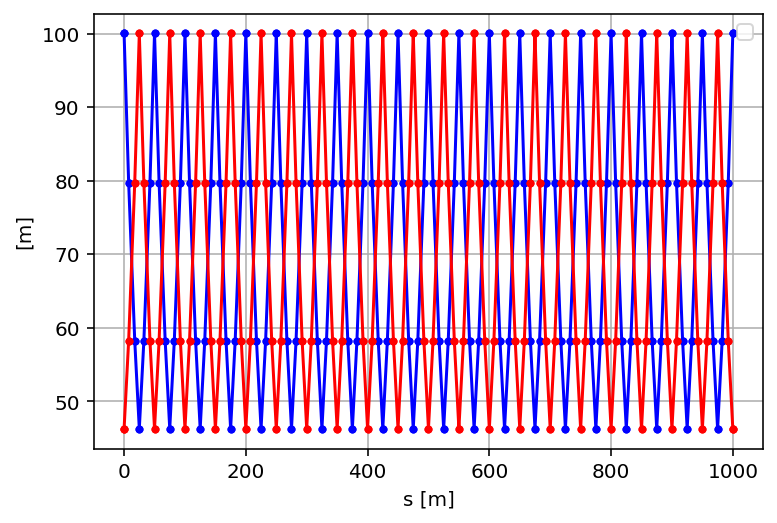

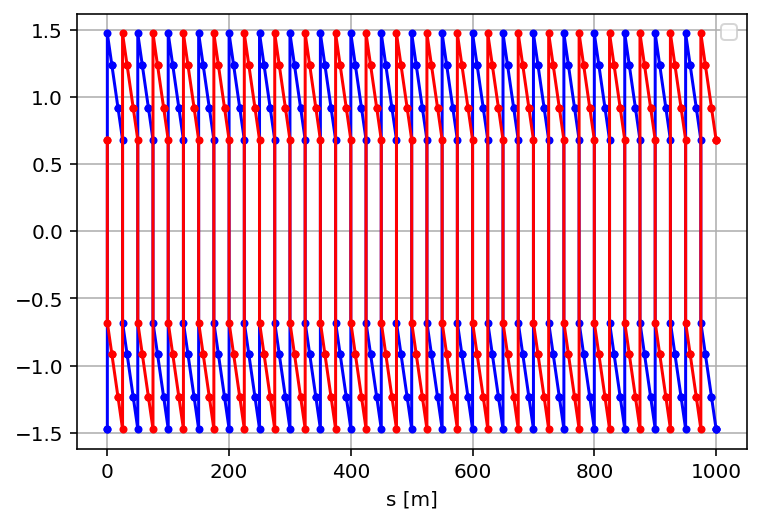

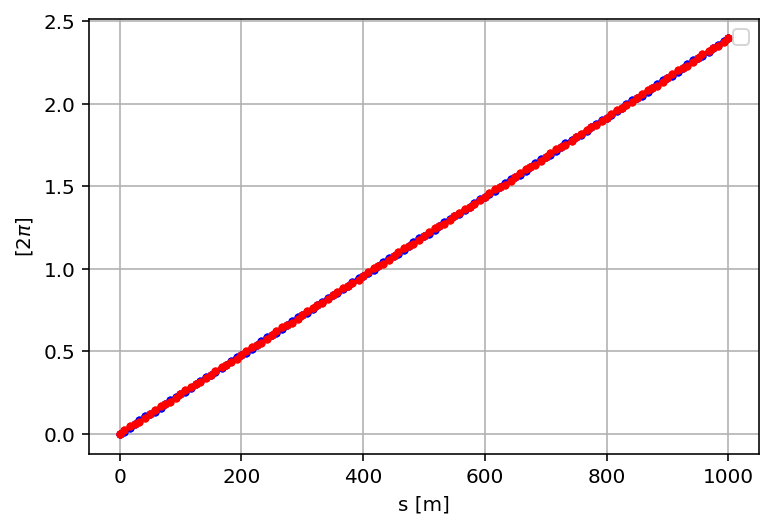

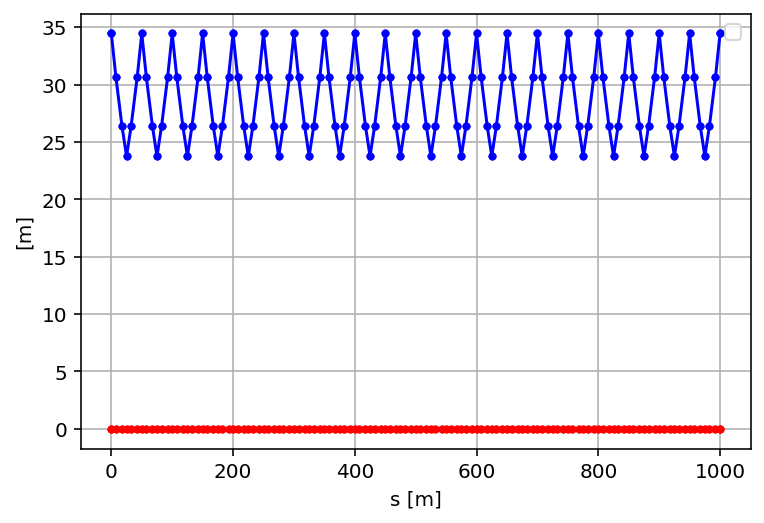

In [4]:
plt.plot(myTwiss.s,myTwiss.betx,'.-b')
plt.plot(myTwiss.s,myTwiss.bety,'.-r')
plt.ylabel('[m]')
plt.xlabel('s [m]')
plt.grid()
plt.legend()

plt.figure()
plt.plot(myTwiss.s,myTwiss.alfx,'.-b')
plt.plot(myTwiss.s,myTwiss.alfy,'.-r')
plt.xlabel('s [m]')
plt.ylabel('')
plt.grid()
plt.legend()

plt.figure()
plt.plot(myTwiss.s,myTwiss.mux,'.-b')
plt.plot(myTwiss.s,myTwiss.muy,'.-r')
plt.xlabel('s [m]')
plt.ylabel('[2$\pi$]')
plt.grid()
plt.legend()

plt.figure()
plt.plot(myTwiss.s,myTwiss.dx,'.-b')
plt.plot(myTwiss.s,myTwiss.dy,'.-r')
plt.xlabel('s [m]')
plt.ylabel('[m]')
plt.grid()
plt.legend()


## Survey of the machine

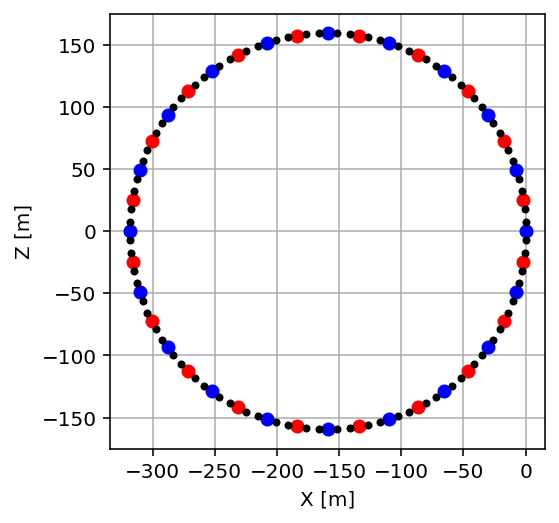

In [5]:
# If you want to be artistic and custumize the plot...
qfSurvey=mySurvey[mySurvey['name'].str.contains('qf')]
qdSurvey=mySurvey[mySurvey['name'].str.contains('qd')]
mbSurvey=mySurvey[mySurvey['name'].str.contains('mb')]

plt.plot(qfSurvey.x,qfSurvey.z,'ob')
plt.plot(qdSurvey.x,qdSurvey.z,'or')
plt.plot(mbSurvey.x,mbSurvey.z,'.k')

plt.axis('square');
plt.xlabel('X [m]')
plt.ylabel('Z [m]')
plt.grid()

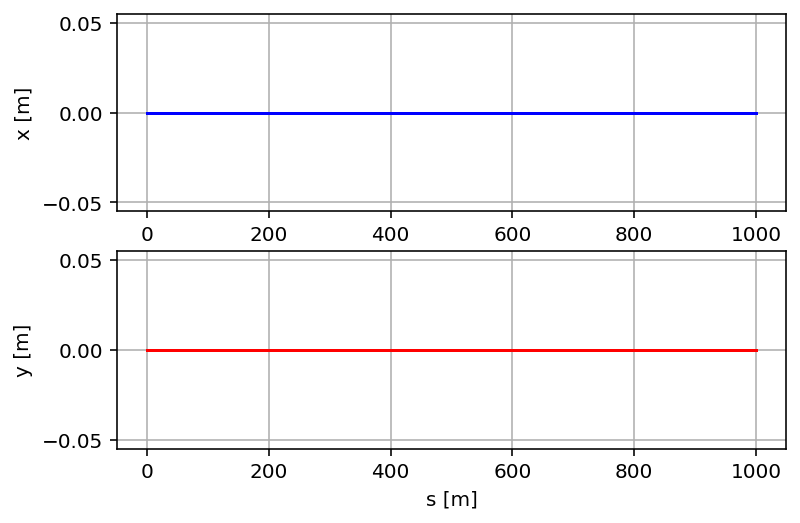

In [6]:
# The Closed orbit corresponds to the reference orbit this time
plt.subplot(211)
plt.plot(myTwiss.s,myTwiss.x,'b')
plt.ylabel('x [m]')
plt.grid()

plt.subplot(212)
plt.plot(myTwiss.s,myTwiss.y,'r')
plt.xlabel('s [m]')
plt.ylabel('y [m]')
plt.grid()

## Can you inject a dipolar error to the machine to see something more interesting?
To do that you can install a **HKICKER** or **VKICKER** or a **KICKER**.
See the manual http://madx.web.cern.ch/madx/webguide/manual.html#Ch10.S11

In order to modify add an element (e.g., a HKICKER) to an existing sequence you can use the SEQEDIT environment.
See the manual http://madx.web.cern.ch/madx/webguide/manual.html#Ch8

In [7]:
myString="""
myKick=0.0001;
myHKicker:hkicker, kick:=myKick;
seqedit, sequence=cas2;
flatten;
install, element=myHKicker1, class=myHKicker,at=0;
flatten;
endedit;
use,sequence=cas2;
twiss;
"""
madx.input(myString)

True

In [8]:
myTwissNew=madx.table.twiss.dframe()

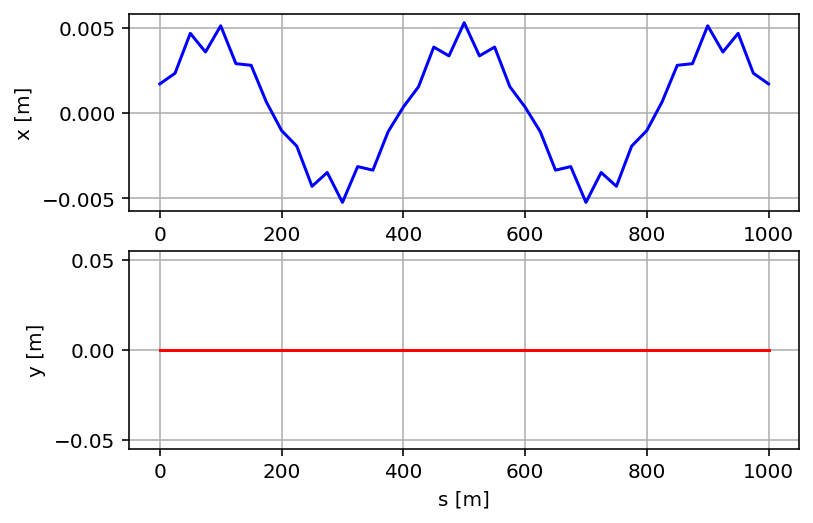

In [9]:
plt.subplot(211)
plt.plot(myTwissNew.s,myTwissNew.x,'b')
plt.ylabel('x [m]')
plt.grid()

plt.subplot(212)
plt.plot(myTwissNew.s,myTwissNew.y,'r')
plt.xlabel('s [m]')
plt.ylabel('y [m]')
plt.grid()

Please compare the previous plot with the closed form formula (see Eq. 8 in pag.54/98 of https://indico.cern.ch/event/780638/contributions/3370282/attachments/1859251/3054978/IntroductionToOpticsDesign.pdf)

\begin{equation}
x_{CO}(s)=\frac{\sqrt{\beta_x(s)\beta_x(s_0)}}{2 \sin(\pi Q_x) } \theta_0 \cos(\phi - \pi Q_x)
\end{equation}

where $\phi$ (>0) is the phase advance from $s_0$ (position of the $\theta_0$ kick) and the $s$.

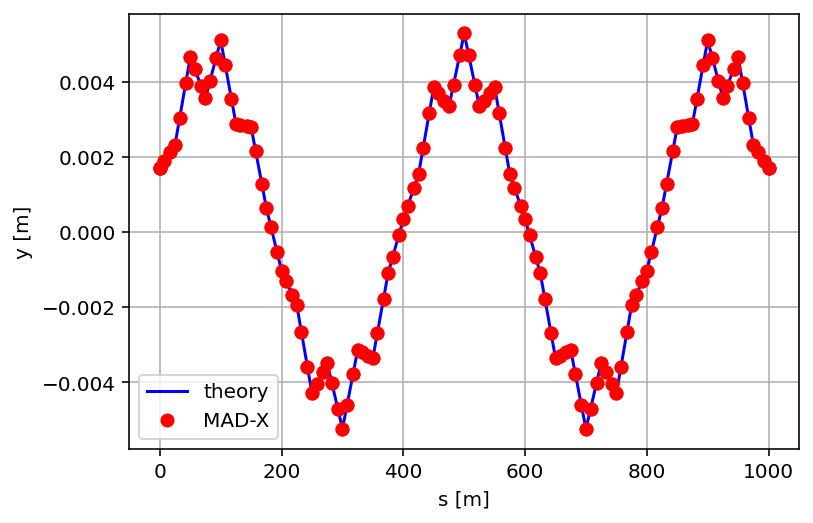

In [10]:
x=np.sqrt(myTwissNew['betx']*myTwissNew['betx'][0])/2/np.sin(np.pi*myTwissNew['mux'][-1])*0.0001*np.cos(myTwissNew['mux']*2*np.pi-np.pi*myTwissNew['mux'][-1])
plt.plot(myTwissNew['s'],x,'b',label='theory')
plt.plot(myTwissNew['s'],myTwissNew['x'],'or',label='MAD-X')
plt.xlabel('s [m]')
plt.ylabel('y [m]')
plt.grid()
plt.legend(loc='best')

### What is the dispersive contribution of the kick?

In [11]:
myString="""
myKick=0.0000;
twiss;
"""
madx.input(myString)
myTwissRef=madx.table.twiss.dframe()

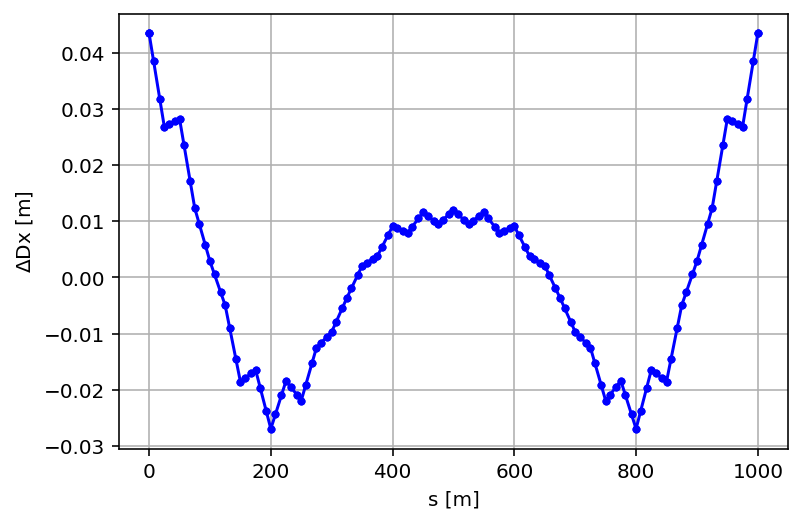

In [12]:
plt.plot(myTwissNew['s'],myTwissNew['dx']-myTwissRef['dx'],'.-b')
plt.xlabel('s [m]')
plt.ylabel('$\Delta$Dx [m]')
plt.grid()
# Why making plt.plot(myTwissNew['s'],myTwissNew['dx']-myTwiss['dx'],'.-b') is wrong?

### Beam envelopes 

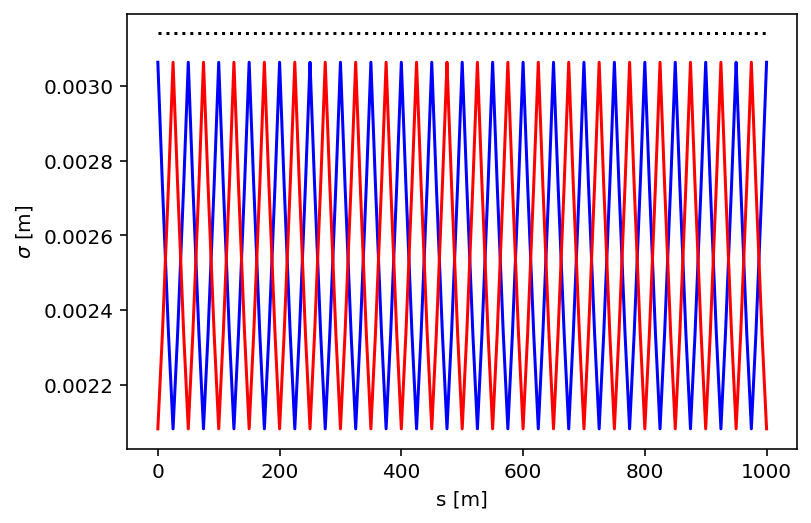

In [13]:
p_GeV_c=20.
E0_GeV=0.938 # it is an approximation
Etot_GeV=np.sqrt(p_GeV_c**2+E0_GeV**2)
Ekin_GeV=Etot_GeV-E0_GeV
aperture_limit=0.00314;
emittance_normalized_x=emittance_normalized_y=2.e-6

gamma=Etot_GeV/E0_GeV
beta=np.sqrt(1-1/gamma**2)
betagamma=beta*gamma

myTwiss['sigmax']=np.sqrt(myTwiss.betx*emittance_normalized_x/betagamma);
myTwiss['sigmay']=np.sqrt(myTwiss.bety*emittance_normalized_y/betagamma);

plt.plot(myTwiss.s,myTwiss.sigmax,'b')
plt.plot(myTwiss.s,myTwiss.sigmay,'r')

plt.plot(myTwiss.s, myTwiss.s*0+aperture_limit,'k:')
plt.xlabel('s [m]')
plt.ylabel('$\sigma$ [m]');

#### Dispersion contribution to the envelope
Let us assume a $\Delta p/p_0=10^{-3}$.

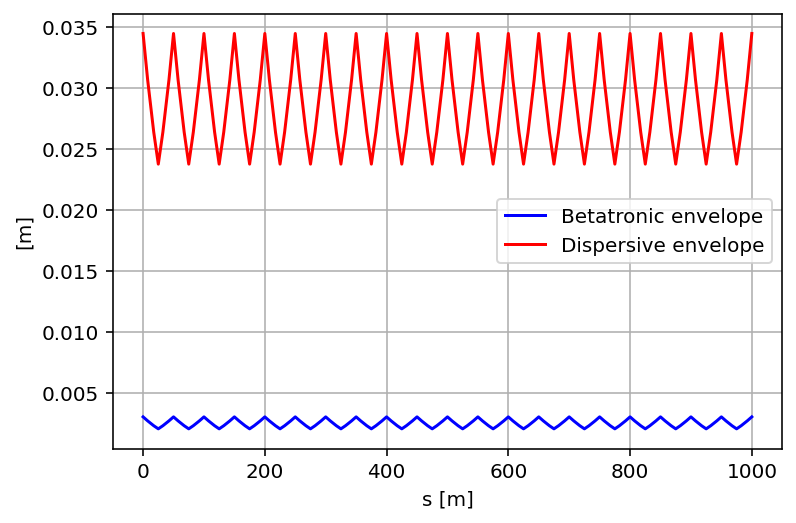

In [14]:
plt.plot(myTwiss.s,myTwiss.sigmax,'b', label='Betatronic envelope')
plt.plot(myTwiss.s,myTwiss.dx*1e-3,'r', label='Dispersive envelope')
plt.xlabel('s [m]')
plt.ylabel('[m]');
plt.grid(True)
plt.legend(loc='best')

### Can you  compute the particle trajectory if you start it (at s=0) with an offset of 1 mm (x'=0)?

In [15]:
madx.input('twiss,x=0.001;')

True

In [16]:
betatronOscillation=madx.table.twiss.dframe()

Text(0, 0.5, 'x [m]')

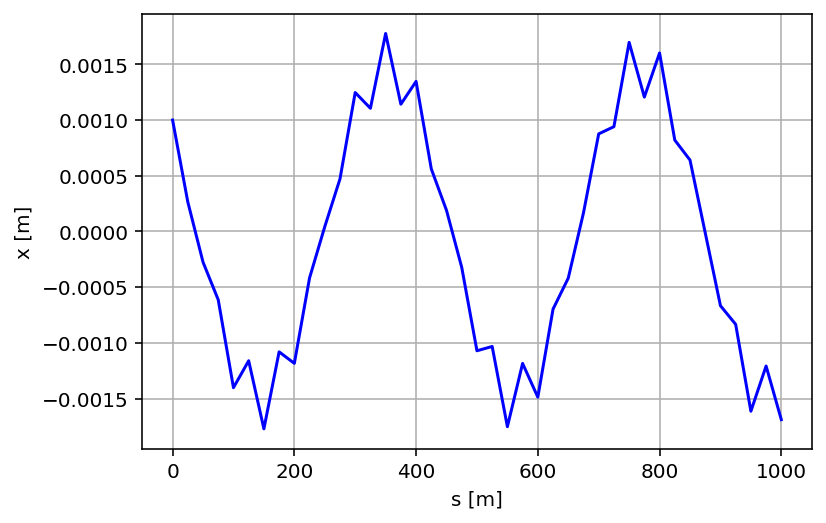

In [17]:
plt.plot(betatronOscillation['s'],betatronOscillation['x'],'b')
plt.grid()
plt.xlabel('s [m]')
plt.ylabel('x [m]')

Can you plot the normalized $x(s)$ vs $\mu_x(s)$?
Remember that 

\begin{equation}
\bar{P}={\begin{pmatrix}
 \sqrt{\beta} &        0\\
-\frac{\alpha}{\sqrt{\beta}} &  \frac{1}{\sqrt{\beta}}
\end{pmatrix}}=
\begin{pmatrix}
 \sqrt{\beta} &        0\\
0 &  \frac{1}{\sqrt{\beta}}
\end{pmatrix}
\begin{pmatrix}
 1 &        0\\
-\frac{\alpha}{\sqrt{\beta}} &  1
\end{pmatrix}
\nonumber
\end{equation}
and that to go in the normal space you need to have 

\begin{equation}
\bar{X}=\bar{P}^{-1} X
\end{equation}
In other word you need to divide $x(s)$ by $\sqrt{\beta(s)}$.

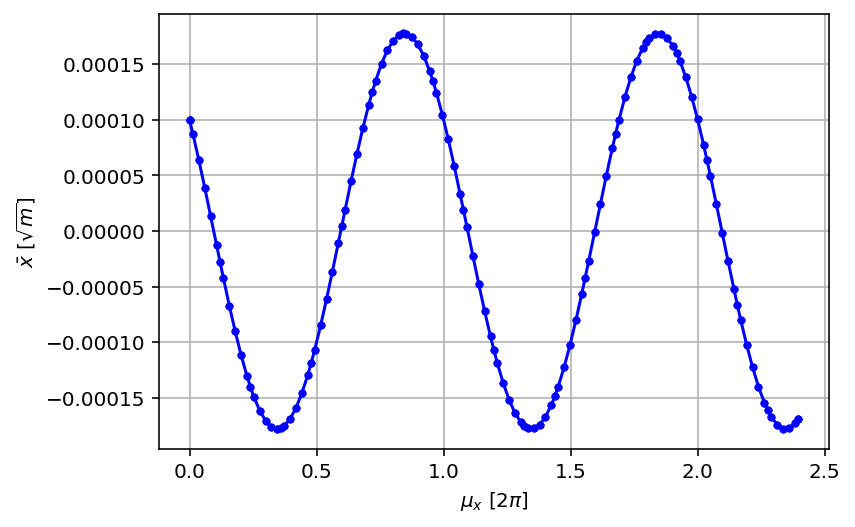

In [18]:
plt.plot(betatronOscillation['mux'],betatronOscillation['x']/np.sqrt(betatronOscillation['betx']),'b.-')
plt.grid()
plt.xlabel('$\mu_x$ [2$\pi$]')
plt.ylabel('$\\bar{x}$ [$\sqrt{m}$]');

### Can you determing by a numerical experiment (tracking) the machine tune?
You can study the tracking module in MAD-X (See for details Chapter 29,
http://madx.web.cern.ch/madx/webguide/manual.html#Ch29)

In [19]:
myString='''
TRACK;
START, X=0.0001, PX=0, Y=0, PY=0, T=0, PT=0;
RUN, TURNS=1023;
ENDTRACK;
'''
madx.input(myString)

True

In [20]:
list(madx.table)

['summ', 'twiss', 'survey', 'tracksumm', 'track.obs0001.p0001']

In [21]:
myParticle=madx.table['track.obs0001.p0001'].dframe()
myParticle.head()

,number,turn,x,px,y,py,t,pt,s,e
#e,1.0,0.0,0.000100,0.000000,0.0,0.0,0.000000e+00,-2.220446e-16,0.0,20.0
#e,1.0,1.0,-0.000169,-0.000002,0.0,0.0,6.982468e-05,-2.220446e-16,0.0,20.0
#e,1.0,2.0,0.000168,0.000003,0.0,0.0,7.089138e-05,-2.220446e-16,0.0,20.0
#e,1.0,3.0,-0.000097,-0.000003,0.0,0.0,-6.340062e-07,-2.220446e-16,0.0,20.0
#e,1.0,4.0,-0.000014,0.000002,0.0,0.0,1.117204e-04,-2.220446e-16,0.0,20.0


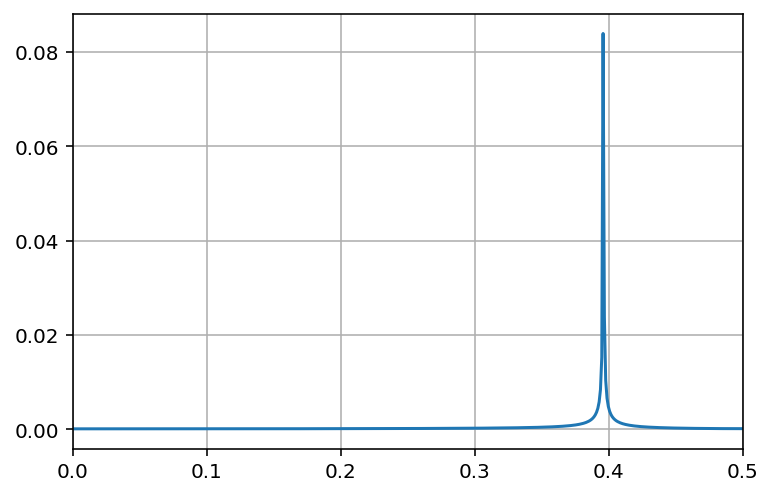

In [22]:
myAmplitude=np.abs(np.fft.fft(myParticle['x']));
myTunes=np.linspace(0,1,1024)
plt.plot(myTunes,myAmplitude)
plt.xlim([0,0.5])
plt.grid()

In [23]:
myTunes[myAmplitude==np.max(myAmplitude)]

array([0.39589443])

In [24]:
# To compare with
madx.table.summ.Q1

array([2.39572424])

In general we can use in our frequency analysis the fact that we expect to have well separated harmonic oscillations and they are time-constant. This is the pyNAFF algorithm https://pypi.org/project/PyNAFF/

In [25]:
import PyNAFF as pnf
import numpy as np

t = np.linspace(1, 1024, num=1024, endpoint=True)
signal = myParticle['x'].values
# outputs an array of arrays for each frequency. Each sub-array includes:
# [order of harmonic, frequency, Amplitude, Re{Amplitude}, Im{Amplitude]

myListNAFF=[]
myListFFT=[]
for i in np.arange(10,1025):
    myListNAFF.append(pnf.naff(signal, i, 1, 0 , False)[0][1])
    myAmplitude=np.abs(np.fft.fft(myParticle['x'][0:i]));
    myTunes=np.linspace(0,1,i)
    myListFFT.append(np.min(myTunes[myAmplitude==np.max(myAmplitude)]))


ModuleNotFoundError: No module named 'PyNAFF'

We can compare the performace of the regular FFT and pyNAFF by checking their convergence speed varying the number of the turns considered.

In [ ]:
myFig=plt.figure()
plt.plot(np.arange(10,1025),myListNAFF,'b',label='pyNAFF')
plt.plot(np.arange(10,1025),myListFFT,'.r',label='FFT')
plt.plot(np.arange(0,2000),madx.table.summ.Q1[0]+np.arange(0,2000)*0-2,'k',label='exepected')
plt.grid()
plt.ylim(.3957235,.395725)
plt.ylim(.39,.40)
plt.xlim(0,1100)
plt.xlabel('Turns used for the frequency analysis')
plt.legend(loc='best')

In [ ]:
myFig.gca().set_ylim(.3957235,.395725)
display(myFig)